# Import required libraries

yfinance   - for download datafrom yahoo finance

pandas     - manipulating datafiles

numpy      - mathematical calcutions

matplotlib - ploting graphs

sklearn    - Machine learing toolkit


In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# Ploting selected data

Apple Inc. has been selected to predition therefore its stock data is downloaded and ploted.

[*********************100%***********************]  1 of 1 completed
data downloaded


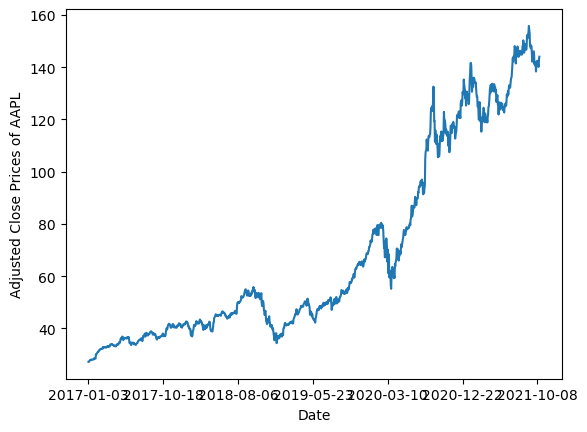

In [2]:
apple_data = yf.download("AAPL", start="2017-10-31", end="2022-10-31")
apple_df = pd.DataFrame(apple_data)
apple_df.to_csv("apple_data.csv")
print('data downloaded')

read_dfile = pd.read_csv("AAPL.csv")
read_dfile.set_index("Date", inplace=True)
read_dfile['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices of AAPL")
plt.show()

# Data pre-processing


## Read the file and set the date as the index

In [3]:
data_frames = pd.read_csv("apple_data.csv")
data_frames.set_index("Date", inplace=True)
data_frames.dropna(inplace=True)

## Feature selection

In [4]:
x = data_frames.iloc[:, 0:5].values
y = data_frames.iloc[:, 4].values

## Divide into train and test datasets.

In [5]:
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x, y, test_size=0.26,  random_state=0)

## Scaling the features

In [6]:
sc_feature = StandardScaler()
x_train_data = sc_feature.fit_transform(x_train_data)
x_test_data = sc_feature.transform(x_test_data)

## Hyperparemater tuning

In [11]:
bp_test_grid = {
'n_estimators': [20, 50, 100, 500, 1000],
'max_depth': np.arange(1, 15, 1),
'min_samples_split': [2, 10, 9],
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
'bootstrap': [True, False],
'random_state': [1, 2, 30, 42]
}

t_model = RandomForestRegressor()

rscv = RandomizedSearchCV(estimator=t_model, param_distributions=bp_test_grid, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train_data, y_train_data)
print("rcv finished")
best_params = rscv_fit.best_params_
print(best_params)


Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=1000, random_state=30; total time=   3.2s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=9, min_samples_split=10, n_estimators=100, random_state=1; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=9, min_samples_split=10, n_estimators=100, random_state=1; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=9, min_samples_split=9, n_estimators=100, random_state=42; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=9, min_samples_split=9, n_estimators=100, random_state=42; total time=   0.3s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=5, min_samples_split=9, n_estimators=20, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, min_samples_leaf=9, min_samples_split=2, n_estimators=20, random_state=1; total time=   0.1s

[CV] END bootstrap=False, max_depth=7, min_samples_leaf=9, min_samples_split=2, n_estimators=50, random_state=42; total time=   0.2s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=1, min_samples_split=9, n_estimators=20, random_state=42; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=1, min_samples_split=9, n_estimators=20, random_state=42; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50, random_state=1; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=100, random_state=30; total time=   0.4s
[CV] END bootstrap=True, max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=100, random_state=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=13, min_samples_split=9, n_estimators=500, random_state=1; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_

[CV] END bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.1s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=9, min_samples_split=2, n_estimators=50, random_state=42; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=42; total time=   2.4s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=500, random_state=1; total time=   1.8s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=5, min_samples_split=9, n_estimators=20, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, min_samples_leaf=9, min_samples_split=2, n_estimators=20, random_state=1; total time=   0.1s
[CV] END bootstrap=True, max_depth=11, min_samples_leaf=11, min_samples_split=10, n_estimators=20, random_state=42; total time=   0.1s
[CV] END bootstrap=True, max_depth=11, min_samples_leaf=11, min_sa

[CV] END bootstrap=False, max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=1000, random_state=30; total time=   3.0s
[CV] END bootstrap=False, max_depth=12, min_samples_leaf=9, min_samples_split=10, n_estimators=500, random_state=30; total time=   1.8s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=13, min_samples_split=9, n_estimators=1000, random_state=42; total time=   2.9s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=7, min_samples_split=9, n_estimators=50, random_state=1; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, min_samples_leaf=7, min_samples_split=10, n_estimators=50, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, random_state=1; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, m

[CV] END bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.1s
[CV] END bootstrap=False, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=42; total time=   2.4s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=500, random_state=1; total time=   1.8s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=9, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=13, min_samples_split=9, n_estimators=500, random_state=1; total time=   1.4s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=13, min_samples_split=9, n_estimators=1000, random_state=42; total time=   2.9s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=9, min_samp

[CV] END bootstrap=True, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=20, random_state=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, random_state=42; total time=   2.5s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, random_state=30; total time=   4.2s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=9, n_estimators=1000, random_state=1; total time=   2.9s
[CV] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=9, n_estimators=1000, random_state=30; total time=   2.4s
[CV] END bootstrap=True, max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, random_state=30; total time=   3.8s
[CV] END bootstrap=True, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=30; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=7, m

[CV] END bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=10, n_estimators=500, random_state=30; total time=   1.7s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_estimators=1000, random_state=2; total time=   3.4s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=1; total time=   0.2s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=1; total time=   0.2s
[CV] END bootstrap=False, max_depth=1, min_samples_leaf=7, min_samples_split=2, n_estimators=500, random_state=30; total time=   1.2s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=11, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.7s
[CV] END bootstrap=False, max_depth=2, min_samples_leaf=7, min_samples_split=2, n_estimators=50, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=9, min_sampl

# Apply model and predict 

In [16]:
n_estimators=best_params['n_estimators'] 
random_state=best_params['random_state']
min_samples_split=best_params['min_samples_split']
min_samples_leaf=best_params['min_samples_leaf']
max_depth=best_params['max_depth']
bootstrap=best_params['bootstrap']

print("n_estimators "+str(n_estimators))
print("random_state "+str(random_state))
print("min_samples_split "+str(min_samples_split))
print("min_samples_leaf "+str(min_samples_split))
print("max_depth "+str(max_depth))
print("bootstrap "+str(bootstrap))

model = RandomForestRegressor(n_estimators, random_state=random_state, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_depth=max_depth, bootstrap=bootstrap)
model.fit(x_train_data, y_train_data)
predict_mdl = model.predict(x_test_data)

print(predict_mdl)
print(predict_mdl.shape)

n_estimators 1000
random_state 1
min_samples_split 2
min_samples_leaf 2
max_depth 10
bootstrap False
[ 41.50278091  57.65683185  42.67457962 140.66820329  45.64907074
  41.42442627  42.13838673  64.28690765  48.33906223  78.75343303
  59.36374073 113.98405457 139.29347681  50.28410721 123.03393378
 178.60371185 135.92536732 142.47384135  42.22247696 150.83154773
 142.10226096  40.30887424 123.19327791  57.58280315 147.56756319
  54.83099365 120.39474323 126.47716904  51.98200314  78.42318812
  44.44763026 162.48524475 157.10624646  41.66134491 122.66549253
 131.94613647 132.87705475 151.77075961  54.83099365  36.84110928
  42.22247696 144.23987192 149.35833232 157.3141745  143.20704149
  39.62200928 156.90244655 141.46199036  45.16692988 171.44418805
 148.9727277   52.45075922 123.83944989  42.13838673  78.6407903
  42.48696264 108.41977789 171.78574365  40.59500587  45.93991343
  36.88470196 146.07435608 173.89044189  48.59230781  46.80246105
 124.19439093 151.77104074  78.69075634 16

# Statistical metrics and performance evaluation

In [20]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test_data, predict_mdl), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test_data, predict_mdl), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test_data, predict_mdl)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test_data, predict_mdl), 4))
print(f'Train Score % : {model.score(x_train_data, y_train_data) * 100:.2f}')
print(f'Test Score for Random Tree Regressor % : {model.score(x_test_data, y_test_data) * 100:.2f}')

errors = abs(predict_mdl - y_test_data)
mape = 100 * (errors / y_test_data)
accuracy = 100 - np.mean(mape)
print('Accuracy % :', round(accuracy, 2))

Mean Absolute Error: 0.1327
Mean Squared Error: 0.0481
Root Mean Squared Error: 0.2193
(R^2) Score: 1.0
Train Score % : 100.00
Test Score for Random Tree Regressor % : 100.00
Accuracy % : 99.86


# Collect future days from predicted values and plot

In [23]:
stock_preds = pd.DataFrame({"Predictions": predict_mdl})
print(stock_preds)

dates =pd.date_range(start=data_frames.index[-1], periods=len(predict_mdl), freq="D")
print(dates)

stock_preds = pd.DataFrame({"Predictions": predict_mdl,"Date":dates})
stock_preds.to_csv("Predicted-price-data.csv")

year_dfrms = pd.DataFrame(stock_preds[:252])
year_dfrms.to_csv("one-year-predictions.csv")

month_dfrms = pd.DataFrame(stock_preds[:21])
month_dfrms.to_csv("one-month-predictions.csv")

fivedays_dfrms = pd.DataFrame(stock_preds[:5])
fivedays_dfrms.to_csv("five-days-predictions.csv")

     Predictions
0      41.502781
1      57.656832
2      42.674580
3     140.668203
4      45.649071
..           ...
323   135.863523
324   143.896453
325    50.284107
326    89.007206
327    46.834945

[328 rows x 1 columns]
DatetimeIndex(['2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-05', '2022-11-06',
               ...
               '2023-09-11', '2023-09-12', '2023-09-13', '2023-09-14',
               '2023-09-15', '2023-09-16', '2023-09-17', '2023-09-18',
               '2023-09-19', '2023-09-20'],
              dtype='datetime64[ns]', length=328, freq='D')


## One year prediction

AAPL Stock Buy price and date
            Unnamed: 0  Predictions
Date                               
2023-04-22         176    35.193616
AAPL Stock Sell price and date
            Unnamed: 0  Predictions
Date                               
2023-04-26         180   178.796817


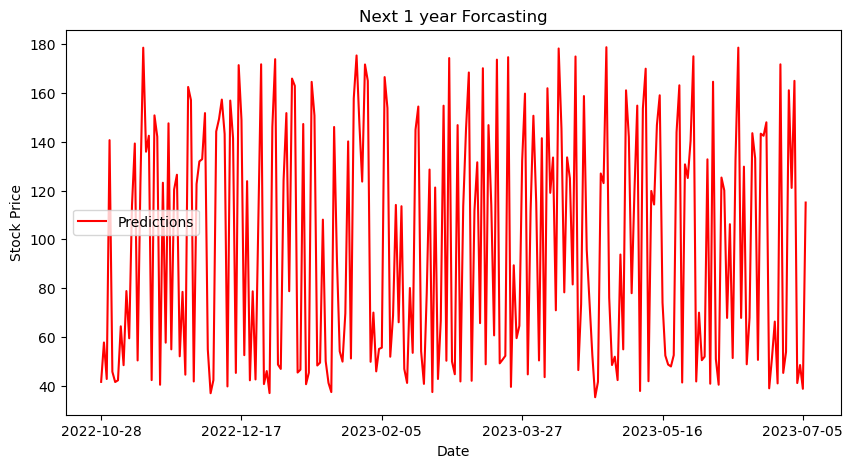

In [30]:
year_df_pred = pd.read_csv("one-year-predictions.csv")
year_df_pred.set_index("Date", inplace=True)

stk_buy_price = min(year_df_pred["Predictions"])
stk_sell_price = max(year_df_pred["Predictions"])
year_buy = oneyear_df_pred.loc[year_df_pred["Predictions"] == stk_buy_price]
year_sell = oneyear_df_pred.loc[year_df_pred["Predictions"] == stk_sell_price]

print("AAPL Stock Buy price and date")
print(year_buy)
print("AAPL Stock Sell price and date")
print(year_sell)

year_df_pred["Predictions"].plot(figsize=(10, 5), title="Next 1 year Forcasting", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## One month prediction

AAPL Stock Buy price and date
            Unnamed: 0  Predictions
Date                               
2022-11-02           5    41.424426
AAPL Stock  Sell price and date
            Unnamed: 0  Predictions
Date                               
2022-11-12          15   178.603712


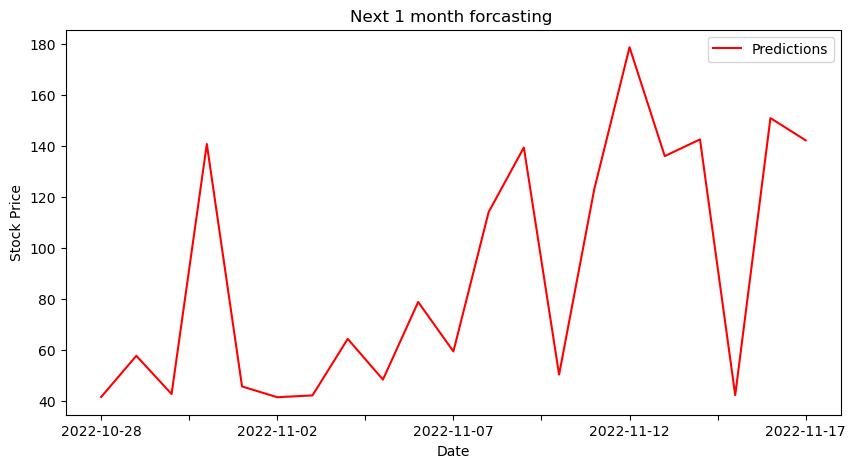

In [28]:
month_df_pred = pd.read_csv("one-month-predictions.csv")
month_df_pred.set_index("Date", inplace=True)

stk_buy_price = min(month_df_pred["Predictions"])
stk_sell_price = max(month_df_pred["Predictions"])
month_buy = month_df_pred.loc[month_df_pred["Predictions"] == stk_buy_price]
month_sell = month_df_pred.loc[month_df_pred["Predictions"] == stk_sell_price]

print("AAPL Stock Buy price and date")
print(month_buy)
print("AAPL Stock  Sell price and date")
print(month_sell)

month_df_pred["Predictions"].plot(figsize=(10, 5), title="Next 1 month forcasting ", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## Five days prediction

Buy price and date
            Unnamed: 0  Predictions
Date                               
2022-10-28           0    41.502781
Sell price and date
            Unnamed: 0  Predictions
Date                               
2022-10-31           3   140.668203


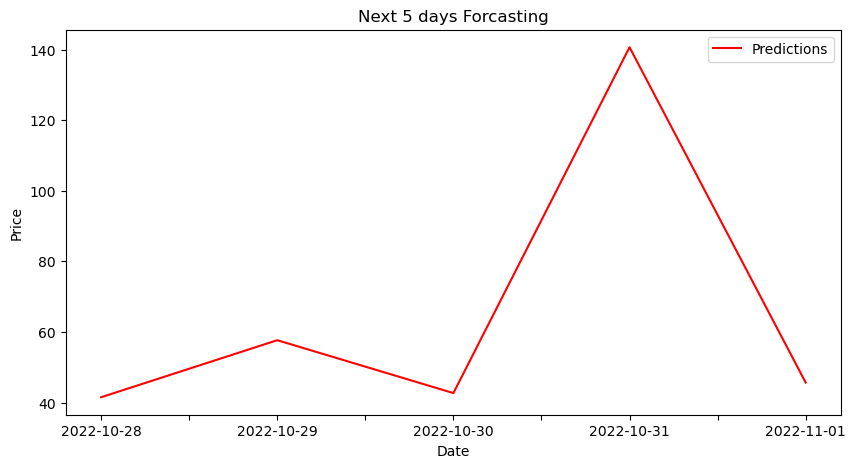

In [29]:
stk5days_df_pred = pd.read_csv("five-days-predictions.csv")
stk5days_df_pred.set_index("Date", inplace=True)

stk_buy_price = min(stk5days_df_pred["Predictions"])
stk_sell_price = max(stk5days_df_pred["Predictions"])
stk5days_buy = stk5days_df_pred.loc[stk5days_df_pred["Predictions"] == stk_buy_price]
stk5days_sell = stk5days_df_pred.loc[stk5days_df_pred["Predictions"] == stk_sell_price]

print("Buy price and date")
print(stk5days_buy)
print("Sell price and date")
print(stk5days_sell)

stk5days_df_pred["Predictions"].plot(figsize=(10, 5), title="Next 5 days Forcasting", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()